In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [9]:
f = lambda theta: 0.5 * ((theta[0] ** 2 - theta[1]) ** 2 + (theta[0] - 1) ** 2)

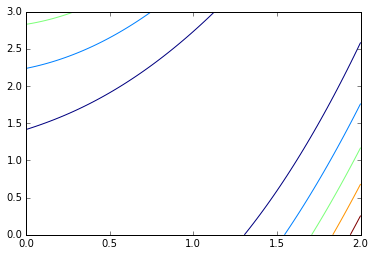

In [40]:
x = np.linspace(0.0, 2.0, 101)
y = np.linspace(0.0, 3.0, 101)
X, Y = np.meshgrid(x, y)
Z = [[f([xx, yy]) for xx in x] for yy in y]

plt.contour(X, Y, Z)
plt.show()